### Question
В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову

In [2]:
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [20]:
milk = pd.read_csv('monthly-milk-production2.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

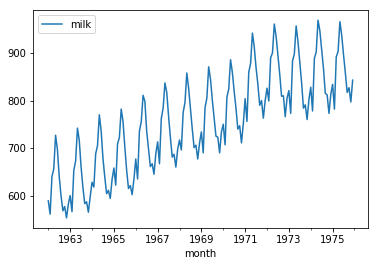

In [21]:
milk.plot(kind='line')

Примените к ряду из предыдущего вопроса критерий Дики-Фуллера

In [22]:
import statsmodels.api as sm
pvalue = sm.tsa.stattools.adfuller(milk['milk'].values)[1]

In [23]:
print (u'достигаемый уровень значимости = ' + str(pvalue))

достигаемый уровень значимости = 0.6274267086030316


Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.
Корректно определить число дней в месяце можно с помощью свойства days_in_month у индекса ряда или функции monthrange из пакета calendar. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

In [24]:
import calendar

In [25]:
milk['days_in_month']=milk.index.days_in_month

In [26]:
milk['milk_adj']=milk['milk']/milk['days_in_month']

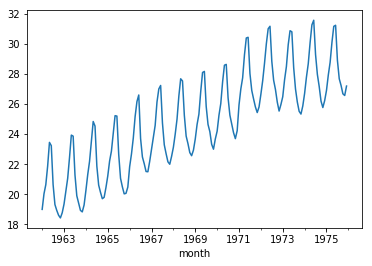

In [27]:
milk['milk_adj'].plot(kind='line')

В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.

In [28]:
milk['milk_adj'].sum()

4166.326661899466


Question 7
Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерия Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным. 
Дифференцирование можно делать так:


milk.daily_diff1 = milk.daily - milk.daily.shift(1)


Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:


milk.daily_diff12 = milk.daily - milk.daily.shift(12)


При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости. 

In [36]:
(milk['milk_adj'] - milk['milk_adj'].shift(2))

month
1962-01-01         NaN
1962-02-01         NaN
1962-03-01    1.645161
1962-04-01    1.830952
1962-05-01    2.806452
1962-06-01    1.366667
1962-07-01   -2.806452
1962-08-01   -3.910753
1962-09-01   -1.711828
1962-10-01   -0.709677
1962-11-01   -0.500000
1962-12-01    0.161290
1963-01-01    0.921505
1963-02-01    1.440092
1963-03-01    1.709677
1963-04-01    2.219048
1963-05-01    2.870968
1963-06-01    1.433333
1963-07-01   -2.645161
1963-08-01   -3.963441
1963-09-01   -1.856989
1963-10-01   -0.967742
1963-11-01   -0.600000
1963-12-01    0.354839
1964-01-01    1.424731
1964-02-01    2.020022
1964-03-01    1.935484
1964-04-01    2.189655
1964-05-01    2.645161
1964-06-01    1.033333
                ...   
1973-07-01   -2.451613
1973-08-01   -3.800000
1973-09-01   -2.286022
1973-10-01   -1.483871
1973-11-01   -0.800000
1973-12-01    0.354839
1974-01-01    1.376344
1974-02-01    1.914747
1974-03-01    1.967742
1974-04-01    2.280952
1974-05-01    2.580645
1974-06-01    1.500000
1974-

In [51]:
boolen=False
i=0
alpha=0.05
pvalue = sm.tsa.stattools.adfuller(milk['milk_adj'].values)[1]
while boolen==False:
    if alpha < pvalue:
        i=i+1
        daily_diff = (milk['milk_adj'] - milk['milk_adj'].shift(i)).dropna()
        pvalue = sm.tsa.stattools.adfuller(daily_diff)[1]
        print('pvalue = ' + str(pvalue))
    else: 
        boolen=True
        print('сдвиг = ' + str(i))

pvalue = 0.06430054654174293
pvalue = 0.0640145841135659
pvalue = 0.06418479772094991
pvalue = 0.060722280541305816
pvalue = 0.00445826515134184
сдвиг = 5


In [43]:
pvalue = sm.tsa.stattools.adfuller(milk['milk_adj'].values)[1]
pvalue

0.682215151308144

In [68]:
milk['season_dif'] = (milk['milk_adj'] - milk['milk_adj'].shift(12))
pvalue = sm.tsa.stattools.adfuller(milk['season_dif'].dropna().values)[1]
pvalue

0.22127672658830383

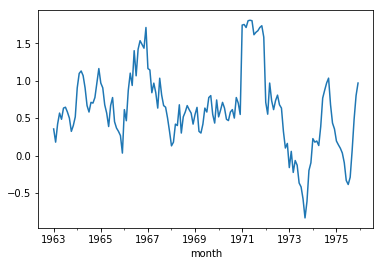

In [69]:
daily_diff.plot()

In [70]:
diff = (milk['season_dif'] - milk['season_dif'].shift(1)).dropna()
pvalue = sm.tsa.stattools.adfuller(diff)[1]
pvalue

2.2808455518036712e-06

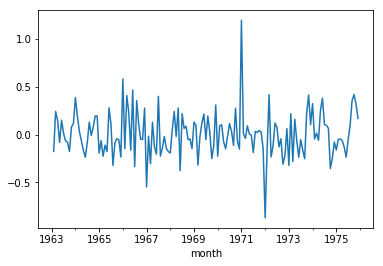

In [71]:
diff.plot()

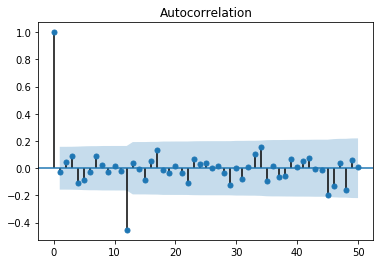

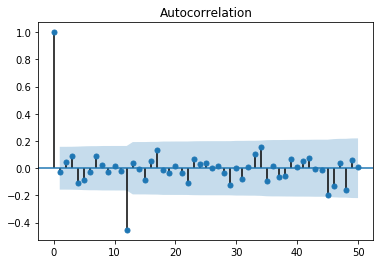

In [72]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(diff.squeeze(), lags=50)

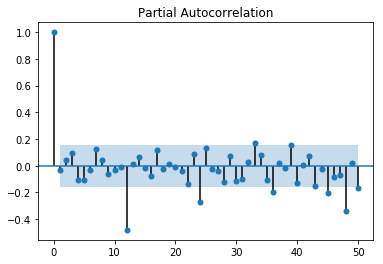

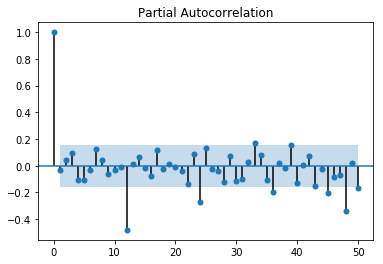

In [73]:
sm.graphics.tsa.plot_pacf(diff.squeeze(), lags=50)